In [2]:
import numpy as np
import scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

Text(0, 0.5, 'ATP Conc. [a.u.]')

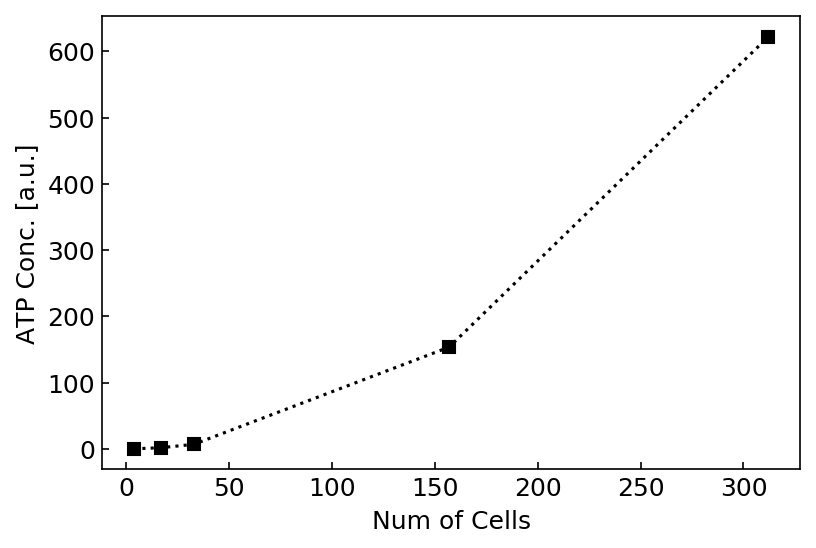

In [3]:

plt.figure(figsize=(6,4),dpi = 150)
plt.tick_params(direction='in',labelsize=12)
Num = [4,17,33,157,312]
Conc = [0.04755,1.6434,6.749276,153.4678,621.68667]
plt.plot(Num,Conc,'ks:',lw=1.5,alpha=1)
plt.xlabel('Num of Cells',fontsize=12)
plt.ylabel('ATP Conc. [a.u.]',fontsize=12)


In [4]:
def func(y,t):
    R, A = y
    Ra = 1 - R 
    Aa = 1 - A 
    kf1 = 2e-3
    kf2 = 1e-3
    kb1 = 2e-4
    kb2 = 1e-4
    
    dRdt = -kf1*R + kb1*Ra
    dAdt = -kf2*R + kb2*Aa
    
    dydt = [dRdt, dAdt]
    
    return dydt 

time = scipy.linspace(0,2000,1000000)
y0 = [1,1]

y = odeint(func,y0,time)
    

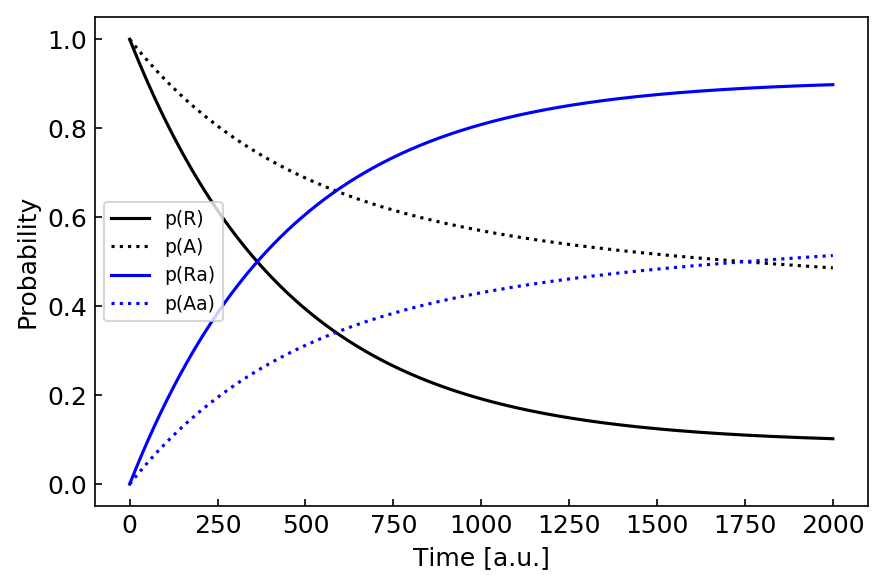

In [5]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=12)
plt.plot(time,y[:,0],'k-',alpha=1,lw=1.5,label='p(R)')
plt.plot(time,y[:,1],'k:',alpha=1,lw=1.5,label='p(A)')
plt.plot(time,1-y[:,0],'b-',alpha=1,lw=1.5,label='p(Ra)')
plt.plot(time,1-y[:,1],'b:',alpha=1,lw=1.5,label='p(Aa)')
plt.xlabel('Time [a.u.]',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

In [3]:
R0 = 1
A0 = 1

R = []
A = []
Ra = []
Aa = []
atp = scipy.linspace(0,1.5,1000000)
n = 0
for i in scipy.linspace(0,2000,1000000):
    if i == 0:
        R_old = 1
        A_old = 1
    
    Ra_old = 1 - R_old
    Aa_old = 1 - A_old
    
    # Directed migration related constant
    kf1 = np.random.normal(0.2,0.4)
    kb1 = np.random.normal(0.01,0.02)

    # Undireted migration related constants 
    kf2 = np.random.normal(0.01,0.02)
    kb2 = np.random.normal(0.008,0.016)
    
    #kf1 = np.random.normal(6e-4,6e-1)
    #kf2 = np.random.normal(2e-4,2e-1)
    #kb1 = np.random.normal(4e-5,4e-2)
    #kb2 = np.random.normal(2e-5,2e-2)
    
    R_new = R_old + 0.002*(-kf1*atp[n]*R_old + kb1*Ra_old)
    A_new = A_old + 0.002*(-kf2*atp[n]*R_old + kb2*Aa_old)
    
    R.append(R_new)
    A.append(A_new)
    Ra.append(1-R_new)
    Aa.append(1-A_new)
    
    R_old = R_new
    A_old = A_new
    n += 1

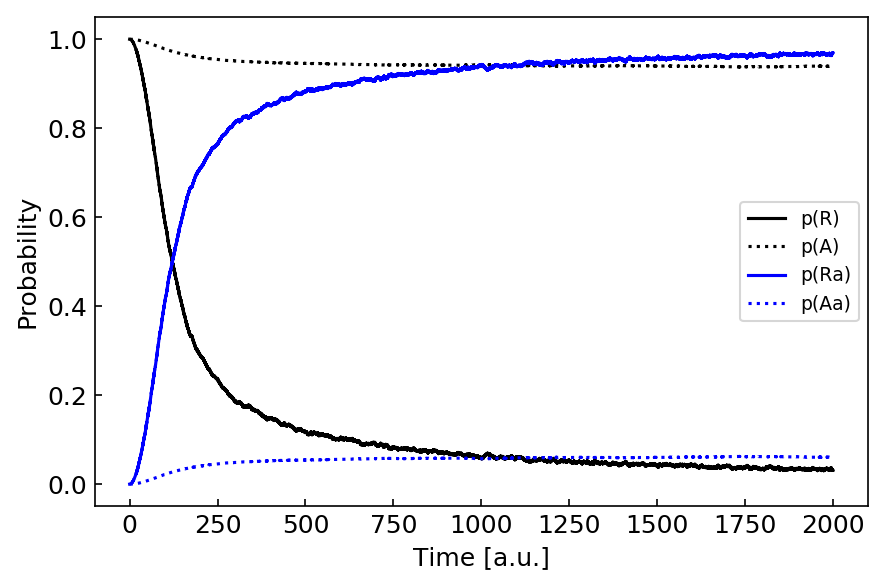

In [4]:
time = scipy.linspace(0,2000,1000000)

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=12)
plt.plot(time,R,'k-',alpha=1,lw=1.5,label='p(R)')
plt.plot(time,A,'k:',alpha=1,lw=1.5,label='p(A)')
plt.plot(time,Ra,'b-',alpha=1,lw=1.5,label='p(Ra)')
plt.plot(time,Aa,'b:',alpha=1,lw=1.5,label='p(Aa)')
plt.xlabel('Time [a.u.]',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

In [91]:
A = np.asarray(['A','B','A','B'])
A[A=='B'] = int(2)

In [92]:
print(A)

['A' '2' 'A' '2']


In [82]:
A = [1,2,3]
print(np.asarray(A)*A)

[1 4 9]


/home/bending456/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


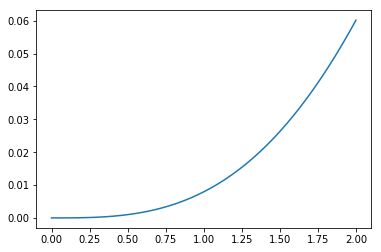

In [80]:
conc = np.linspace(0,2,100)

sig = 1/(1+(5/conc)**3)

plt.plot(conc,sig)

In [25]:
A = np.zeros([8,3])

In [26]:
B = np.ones(10)
C = np.ones(10)*2

D = [B*C,B*B]

In [27]:
E = np.transpose(np.vstack([B,C,np.zeros(10)]))
print(E)

[[1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]]


In [28]:
print(np.shape(A))
print(np.shape(E))
print(np.vstack([A,E]))

(8, 3)
(10, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]
 [1. 2. 0.]]


In [71]:
I0 = 1
DM0 = 1e-14
UM0 = 1e-14


I = []
DM = []
UM = []

conc = np.linspace(0,1,1e6)
n = 0
for i in np.linspace(0,2000,1e6):
    
    if i == 0:
        Iold = I0
        DMold = DM0
        UMold = UM0
        
    delta = np.random.normal(0.5,0.5)
    
    kf1 = np.random.normal(0.3,0.4) # directed
    kf2 = np.random.normal(0.01,0.02) # undirected
    kb1 = np.random.normal(0.01,0.02) # directed
    kb2 = np.random.normal(0.005,0.01) # undirected
    
    
    Inew = Iold + ((kb1*DMold + kb2*UMold) - (conc[n]*kf2 + delta*kf1)*Iold)*0.002 
    DMnew = DMold + (delta*kf1*Iold - kb1*DMold)*0.002
    UMnew = UMold + (conc[n]*kf2*Iold - kb2*UMold)*0.002
    
    I.append(Inew)
    DM.append(DMnew)
    UM.append(UMnew)
    
    Iold = Inew
    DMold = DMnew
    UMold = UMnew
    
    n += 1 


/home/bending456/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.
/home/bending456/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


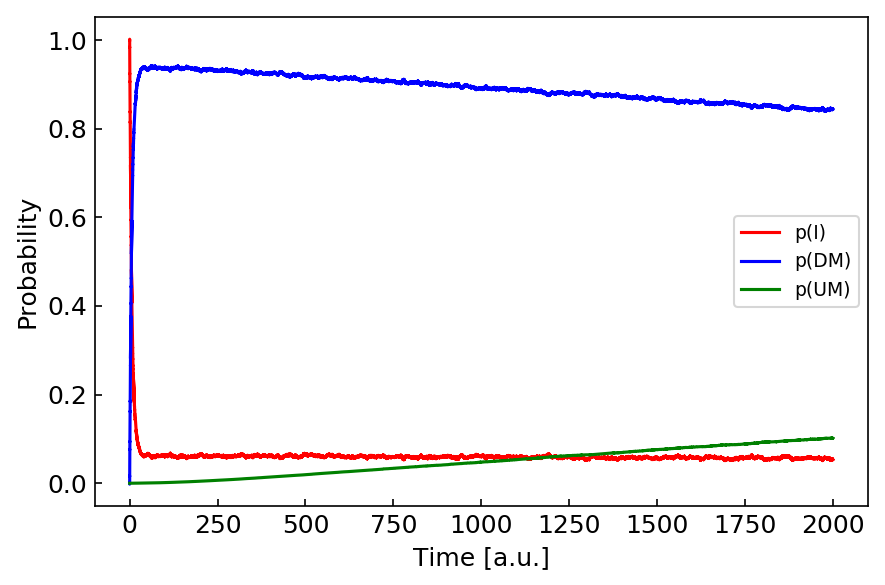

In [72]:
time = scipy.linspace(0,2000,1000000)

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=12)
plt.plot(time,I,'r',alpha=1,lw=1.5,label='p(I)')
plt.plot(time,DM,'b',alpha=1,lw=1.5,label='p(DM)')
plt.plot(time,UM,'g',alpha=1,lw=1.5,label='p(UM)')
plt.xlabel('Time [a.u.]',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

In [1]:
import numpy as np 


In [3]:
A = [1,2,3,5]
A = np.asarray(A)
A[A<2]=999
print(A)

[999   2   3   5]
